### Pregunta 7: Evaluación práctica: Diseño de un controlador PID.

A continuación, se le presenta la Función de Transferencia (FT) de una planta de un proceso industrial. Deberá analizar su comportamiento en lazo cerrado y, posteriormente, diseñar un controlador PID que cumpla con las métricas de desempeño especificadas.

La función de transferencia de la planta es:

$$G_p(s) = \frac{5}{s^2 + 6s + 5}$$

#### Parte 1: Análisis del sistema base (en una celda de Python).

Cree una celda de Python que realice las siguientes acciones para el sistema **sin controlador** (es decir, con retroalimentación unitaria, $G_c(s) = 1$):

1.  Defina la FT de la planta $G_p(s)$.
2.  Obtenga el sistema de la FT de lazo cerrado:
$$G_{LC}(s) = \frac{G_p(s)}{1 + G_p(s)}$$
3.  Imprima en pantalla la $G_{LC}(s)$ y sus polos  (`ct.poles()`).
4.  Genere el mapa de polos y ceros (`ct.pzmap()`).
5.  Grafique la respuesta al escalón unitario (simule por 5 segundos, `T=np.linspace(0, 5, 501)`).
6.  Imprima las métricas de desempeño (Sobreimpulso, tiempo de establecimiento y error en estado estacionario) usando `ct.step_info()` y el valor final de la respuesta.

Función de Transferencia del sistema base (lazo cerrado):
<TransferFunction>: sys[271]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

        5
  --------------
  s^2 + 6 s + 10
Las raíces de s (polos) son:
[-3.+1.j -3.-1.j]


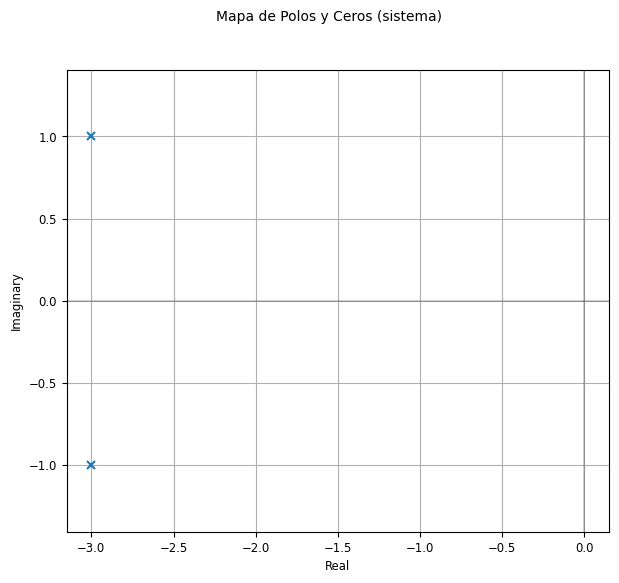

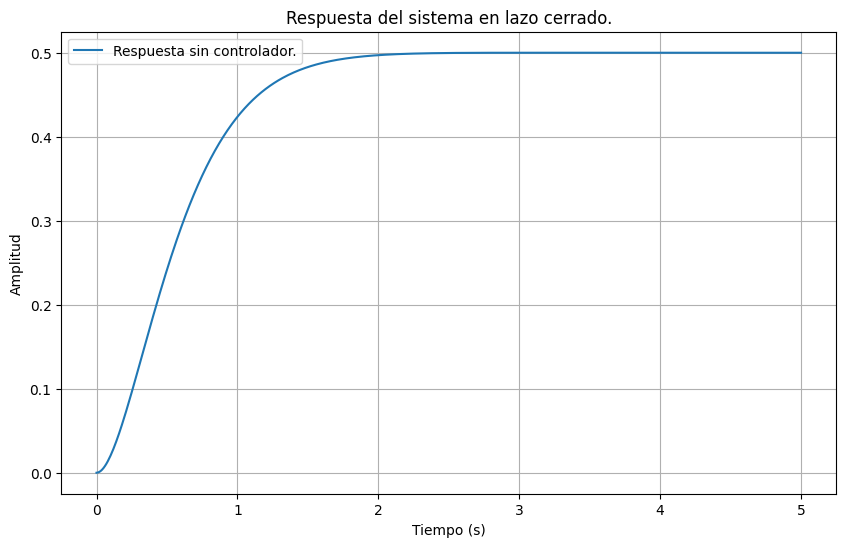

Métricas de desempeño del sistema base:
  - Sobreimpulso (Overshoot): 0.00%
  - Tiempo de establecimiento (SettlingTime): 1.67 s
  - Valor final: 0.5000
  - Error en estado estacionario (1 - valor_final): 0.5000


In [45]:
# Importar las bibliotecas necesarias.
import control as ct
import matplotlib.pyplot as plt
import numpy as np

# --- Definición de la planta Gp(s). ---
num_p = [5]
den_p = [1, 6, 5]
Gp = ct.tf(num_p, den_p)

# --- Sistema en lazo cerrado con retroalimentación unitaria (sin controlador). ---
# Esto es Gc(s) = 1.
sistema_base = ct.feedback(Gp, 1)
print("Función de Transferencia del sistema base (lazo cerrado):")
print(sistema_base)



polos = ct.poles(sistema_base)

# Imprimimos el resultado.
print("Las raíces de s (polos) son:")
print(polos)

# --- Visualización del Mapa de Polos y Ceros ---
plt.figure(figsize=(7, 6))
ct.pzmap(sistema_base, title='Mapa de Polos y Ceros (sistema)')
plt.grid(True)
plt.show()





# --- Simulación de la respuesta al escalón. ---
t = np.linspace(0, 5, 501)
t, y_base = ct.step_response(sistema_base, T=t)

# --- Graficación de la respuesta. ---
plt.figure(figsize=(10, 6))
plt.plot(t, y_base, label="Respuesta sin controlador.")
#plt.axhline(y=1, color="r", linestyle=":", label="Referencia.")

plt.title("Respuesta del sistema en lazo cerrado.")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()

# --- Verificación de las métricas de desempeño. ---
print("Métricas de desempeño del sistema base:")
info = ct.step_info(sistema_base)

# step_info devuelve un diccionario, podemos imprimir los valores clave.
print(f"  - Sobreimpulso (Overshoot): {info['Overshoot']:.2f}%")
print(f"  - Tiempo de establecimiento (SettlingTime): {info['SettlingTime']:.2f} s")

# El error en estado estacionario se verifica observando el valor final.
valor_final = y_base[-1]
print(f"  - Valor final: {valor_final:.4f}")
print(f"  - Error en estado estacionario (1 - valor_final): {1 - valor_final:.4f}")

#### Parte 2: Proceso de diseño del PID.

Observe las métricas de la Parte 1. Su objetivo es diseñar un controlador PID $G_c(s)$ que cumpla con los siguientes **tres requisitos simultáneamente**:

* **Error en estado estacionario ($e_{ss}$):** Cero.
* **Sobreimpulso (Overshoot):** Menor al 5%.
* **Tiempo de establecimiento (al 2%):** Menor a 1.0 segundo.


#### Parte 3: Implementación del controlador PID sintonizado 

Cree una segunda celda de Python que contenga su diseño final. Esta celda debe:

1.  Definir las ganancias $K_p$, $K_i$ y $K_d$ que usted eligió en la Parte 2.
2.  Crear la FT del controlador PID:
$$G_c(s) = \frac{K_d s^2 + K_p s + K_i}{s}$$
3.  Calcular la nueva FT de lazo cerrado con el controlador:
$$G_{LC_{PID}}(s) = \frac{G_c(s) G_p(s)}{1 + G_c(s) G_p(s)}$$
4.  Imprimir la $G_{LC_{PID}}(s)$ y sus nuevos polos.
5.  Generar el mapa de polos y ceros del sistema controlado.
6.  Graficar en una misma figura la respuesta del sistema base (de la Parte 1) y la respuesta de su nuevo sistema con PID sintonizado (simule por 5 segundos).
7.  Imprimir las métricas de desempeño finales para verificar que cumple con los tres requisitos.


Función de Transferencia del sistema de lazon cerrado:
<TransferFunction>: sys[278]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

     15 s^2 + 60 s + 50
  ------------------------
  s^3 + 21 s^2 + 65 s + 50


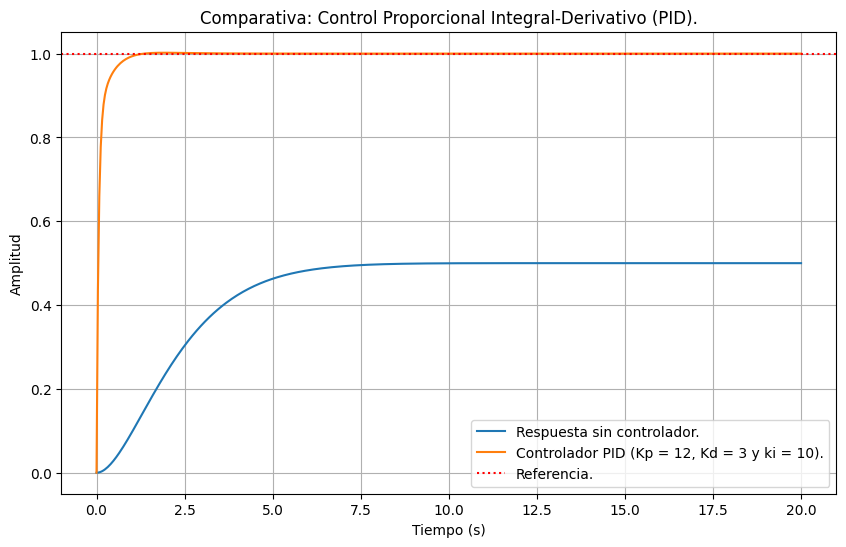

Métricas de desempeño del sistema con controlador Proporcional Integral-Derivativo:
  - Sobreimpulso (Overshoot): 0.21%
  - Tiempo de establecimiento (SettlingTime): 0.72 s
  - Valor final: 1.0000
  - Error en estado estacionario (1 - valor_final): -0.0000


In [46]:

# --- Parámetros del controlador Proporcional-Derivativo. ---
kp_pid = 12
ki_pid = 10
kd_pid = 3

# --- Creación del controlador PID. ---
# El numerador es [Kd, Kp y Ki].
Gc_PID = ct.tf([kd_pid, kp_pid, ki_pid], [0,1,0])

# --- Sistema en lazo cerrado con controlador PID. ---
sistema_PID = ct.feedback(Gc_PID * Gp, 1)
print("Función de Transferencia del sistema de lazon cerrado:")
print(sistema_PID)

# --- Simulación de la respuesta al escalón. ---
t = np.linspace(0, 20, 501)
t, y_PID = ct.step_response(sistema_PID, T=t)

plt.figure(figsize=(10, 6))
plt.plot(t, y_base, label="Respuesta sin controlador.")
plt.plot(t, y_PID, label=f"Controlador PID (Kp = {kp_pid}, Kd = {kd_pid} y ki = {ki_pid}).")
plt.axhline(y=1, color="r", linestyle=":", label="Referencia.")

plt.title("Comparativa: Control Proporcional Integral-Derivativo (PID).")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()

# --- Verificación de las métricas de desempeño. ---
print("Métricas de desempeño del sistema con controlador Proporcional Integral-Derivativo:")
info = ct.step_info(sistema_PID)
print(f"  - Sobreimpulso (Overshoot): {info['Overshoot']:.2f}%")
print(f"  - Tiempo de establecimiento (SettlingTime): {info['SettlingTime']:.2f} s")
valor_final = y_PID[-1]
print(f"  - Valor final: {valor_final:.4f}")
print(f"  - Error en estado estacionario (1 - valor_final): {1 - valor_final:.4f}")

Para los valores iniciales de Ki, Kd y Kp, se tomaron los de la prcatica pasada, donde se propusieron, Ki=10, Kd=10 y Kp=12,con estos valores obtuvimos

* SOBRE IMPULSO= 0.83%
* TIEMPO DE ESTABLECIMIENTO =  1.72
* VLOR FINAL = 1.000
* ERROR DE ESTADO ESTACIONARIO = 0

Como estos valores no cumplen con lo deseado que es: 
* ERROR ESTACIONARIO = 0
* SOBREIMPULSO < 5%
* TIEMPO ESTACIONARIO < 1.0S

Para obtener estos valores se propusieron Ki = 10, Kp = 12 y Kd = 3. El término derivativo Kd influye en el tiempo de respuesta, ya que ayuda a anticipar los errores futuros al reaccionar ante la velocidad de cambio del error. Al aumentar el valor de Kd, se incrementa el tiempo de establecimiento; por lo tanto, como se buscaba reducirlo, fue necesario disminuir dicho valor a 3.
Con estos valores se obtuviron los valores:


Como estos valores no cumplen con lo deseado que es: 
* ERROR ESTACIONARIO = 0
* SOBREIMPULSO= 0.21%
* TIEMPO ESTACIONARIO= 0.72s


Cree una segunda celda de Python que contenga su diseño final. Esta celda debe:

1.  Definir las ganancias $K_p$, $K_i$ y $K_d$ que usted eligió en la Parte 2.
2.  Crear la FT del controlador PID:
$$G_c(s) = \frac{K_d s^2 + K_p s + K_i}{s}$$
3.  Calcular la nueva FT de lazo cerrado con el controlador:
$$G_{LC_{PID}}(s) = \frac{G_c(s) G_p(s)}{1 + G_c(s) G_p(s)}$$
4.  Imprimir la $G_{LC_{PID}}(s)$ y sus nuevos polos.
5.  Generar el mapa de polos y ceros del sistema controlado.
6.  Graficar en una misma figura la respuesta del sistema base (de la Parte 1) y la respuesta de su nuevo sistema con PID sintonizado (simule por 5 segundos).
7.  Imprimir las métricas de desempeño finales para verificar que cumple con los tres requisitos.


Función de Transferencia del sistema Gp:
<TransferFunction>: sys[269]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

        5
  -------------
  s^2 + 6 s + 5
Función de Transferencia del sistema Gc:
<TransferFunction>: sys[275]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

  3 s^2 + 12 s + 10
  -----------------
          s
Función de Transferencia del sistema base (lazo cerrado):
<TransferFunction>: sys[285]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

     15 s^2 + 60 s + 50
  ------------------------
  s^3 + 21 s^2 + 65 s + 50
Las raíces de s (polos) son:
[-17.43667921+0.j  -2.33555142+0.j  -1.22776936+0.j]


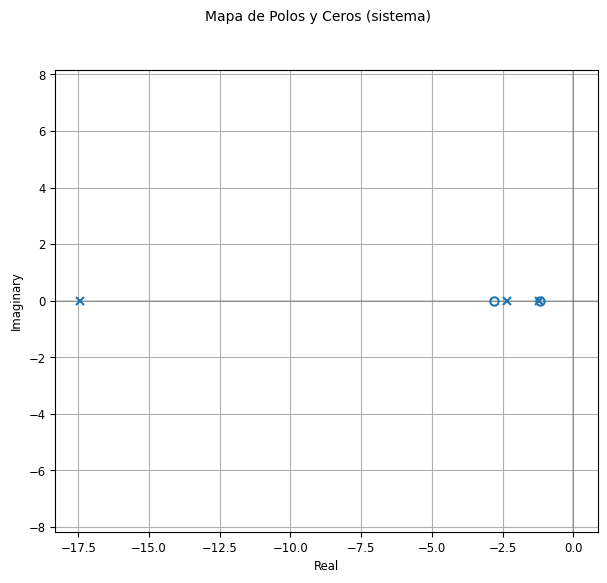

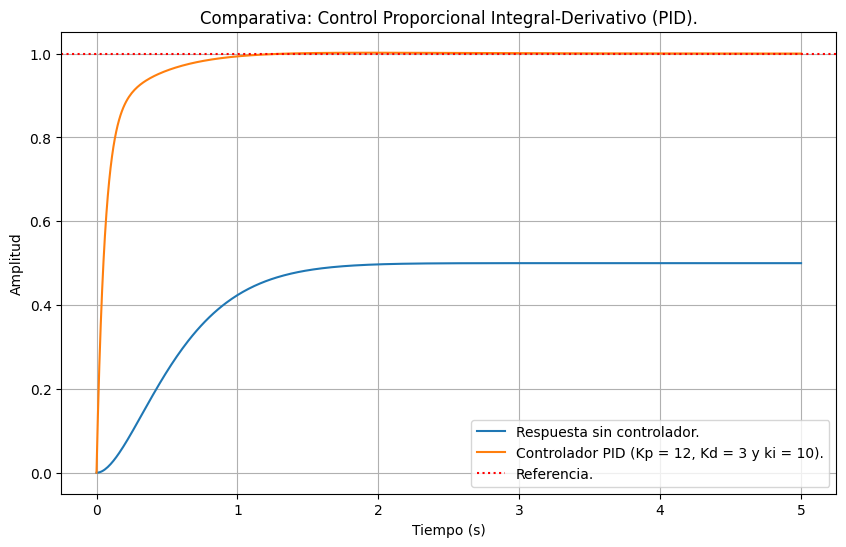

Métricas de desempeño del sistema con controlador Proporcional Integral-Derivativo:
  - Sobreimpulso (Overshoot): 0.21%
  - Tiempo de establecimiento (SettlingTime): 0.72 s
  - Valor final: 1.0001
  - Error en estado estacionario (1 - valor_final): -0.0001


In [47]:
# --- Definición de la planta Gp(s). ---
num_p = [3,12,10]
den_p = [1, 0]
Gc = ct.tf(num_p, den_p)

# --- Sistema en lazo cerrado con retroalimentación unitaria (sin controlador). ---
# Esto es Gc(s) = 1.
sistema_base2 = ct.feedback(Gp*Gc, 1)
print("Función de Transferencia del sistema Gp:")
print(Gp)
print("Función de Transferencia del sistema Gc:")
print(Gc_PID)
print("Función de Transferencia del sistema base (lazo cerrado):")
print(sistema_base2)






# --- Indicar las raíces de s (Polos del sistema). ---
# Para un sistema subamortiguado, esperamos complejos conjugados con parte real negativa.
# Usamos la función ct.poles() para obtener las raíces del denominador.
polos = ct.poles(sistema_base2)

# Imprimimos el resultado.
print("Las raíces de s (polos) son:")
print(polos)

# --- Visualización del Mapa de Polos y Ceros ---
plt.figure(figsize=(7, 6))
ct.pzmap(sistema_base2, title='Mapa de Polos y Ceros (sistema)')
plt.grid(True)
plt.show()


# --- Simulación de la respuesta al escalón. ---
t = np.linspace(0, 5, 501)
t, y_PID = ct.step_response(sistema_PID, T=t)


plt.figure(figsize=(10, 6))
plt.plot(t, y_base, label="Respuesta sin controlador.")
plt.plot(t, y_PID, label=f"Controlador PID (Kp = {kp_pid}, Kd = {kd_pid} y ki = {ki_pid}).")
plt.axhline(y=1, color="r", linestyle=":", label="Referencia.")

plt.title("Comparativa: Control Proporcional Integral-Derivativo (PID).")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()

# --- Verificación de las métricas de desempeño. ---
print("Métricas de desempeño del sistema con controlador Proporcional Integral-Derivativo:")
info = ct.step_info(sistema_PID)
print(f"  - Sobreimpulso (Overshoot): {info['Overshoot']:.2f}%")
print(f"  - Tiempo de establecimiento (SettlingTime): {info['SettlingTime']:.2f} s")
valor_final = y_PID[-1]
print(f"  - Valor final: {valor_final:.4f}")
print(f"  - Error en estado estacionario (1 - valor_final): {1 - valor_final:.4f}")





